## Ogo's working notebook




In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
housing = pd.read_csv('data/kc_house_data.csv')
housing

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Observations:
    floors is a categorical variable/discrete
    waterfront is categorical
    view is categorical
    condition is categorical
    grade is categorical
    yr_renovated - might have null values if house wasnt renovated
    yr_built - might have null values if data couldnt be accessed.
    we can drop id and date sold columns

In [44]:
housing.drop(['id'], axis=1, inplace=True)


In [45]:
housing['date'] =  pd.to_datetime(housing['date'])
housing

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors waterfront  view  condition          grade  sqft_above  \
0         1.0        NaN  NONE    Average      7 Average        1180   
1         2.0         NO  NONE    Average      7 Average        2170   
2         1.0         NO  NONE    Average  6 Low Average         770   
3         1.0         NO  NONE  Very Good      7 Average        1050   
4         1.0         NO  NONE    Average         8 Good        1680   
...       ...        ...   ...        ...            ...         ...   
21592     3.0         NO  NONE    Average         8 Good        1530   
21593     2.0         NO  NONE    Average         8 Good        2310   
21594     2.0         NO  NONE    Average      7 Average        1020   
21595     2.0        NaN  NONE    Average         8 Good        1600   
21596     2.0         NO  NONE    Average      7 Average        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 20 columns]

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [48]:
##checking null values in each column
housing.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [49]:
housing['waterfront'].value_counts(dropna=False)

NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64

In [50]:
housing['view'].value_counts(dropna=False)

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

In [51]:
housing['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [52]:
housing['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [54]:
housing['grade'].value_counts(dropna=False)

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [58]:
housing['date'].max()

Timestamp('2015-05-27 00:00:00')

In [59]:
housing['date'].min()

Timestamp('2014-05-02 00:00:00')

In [ ]:
hou

EXPLORATORY

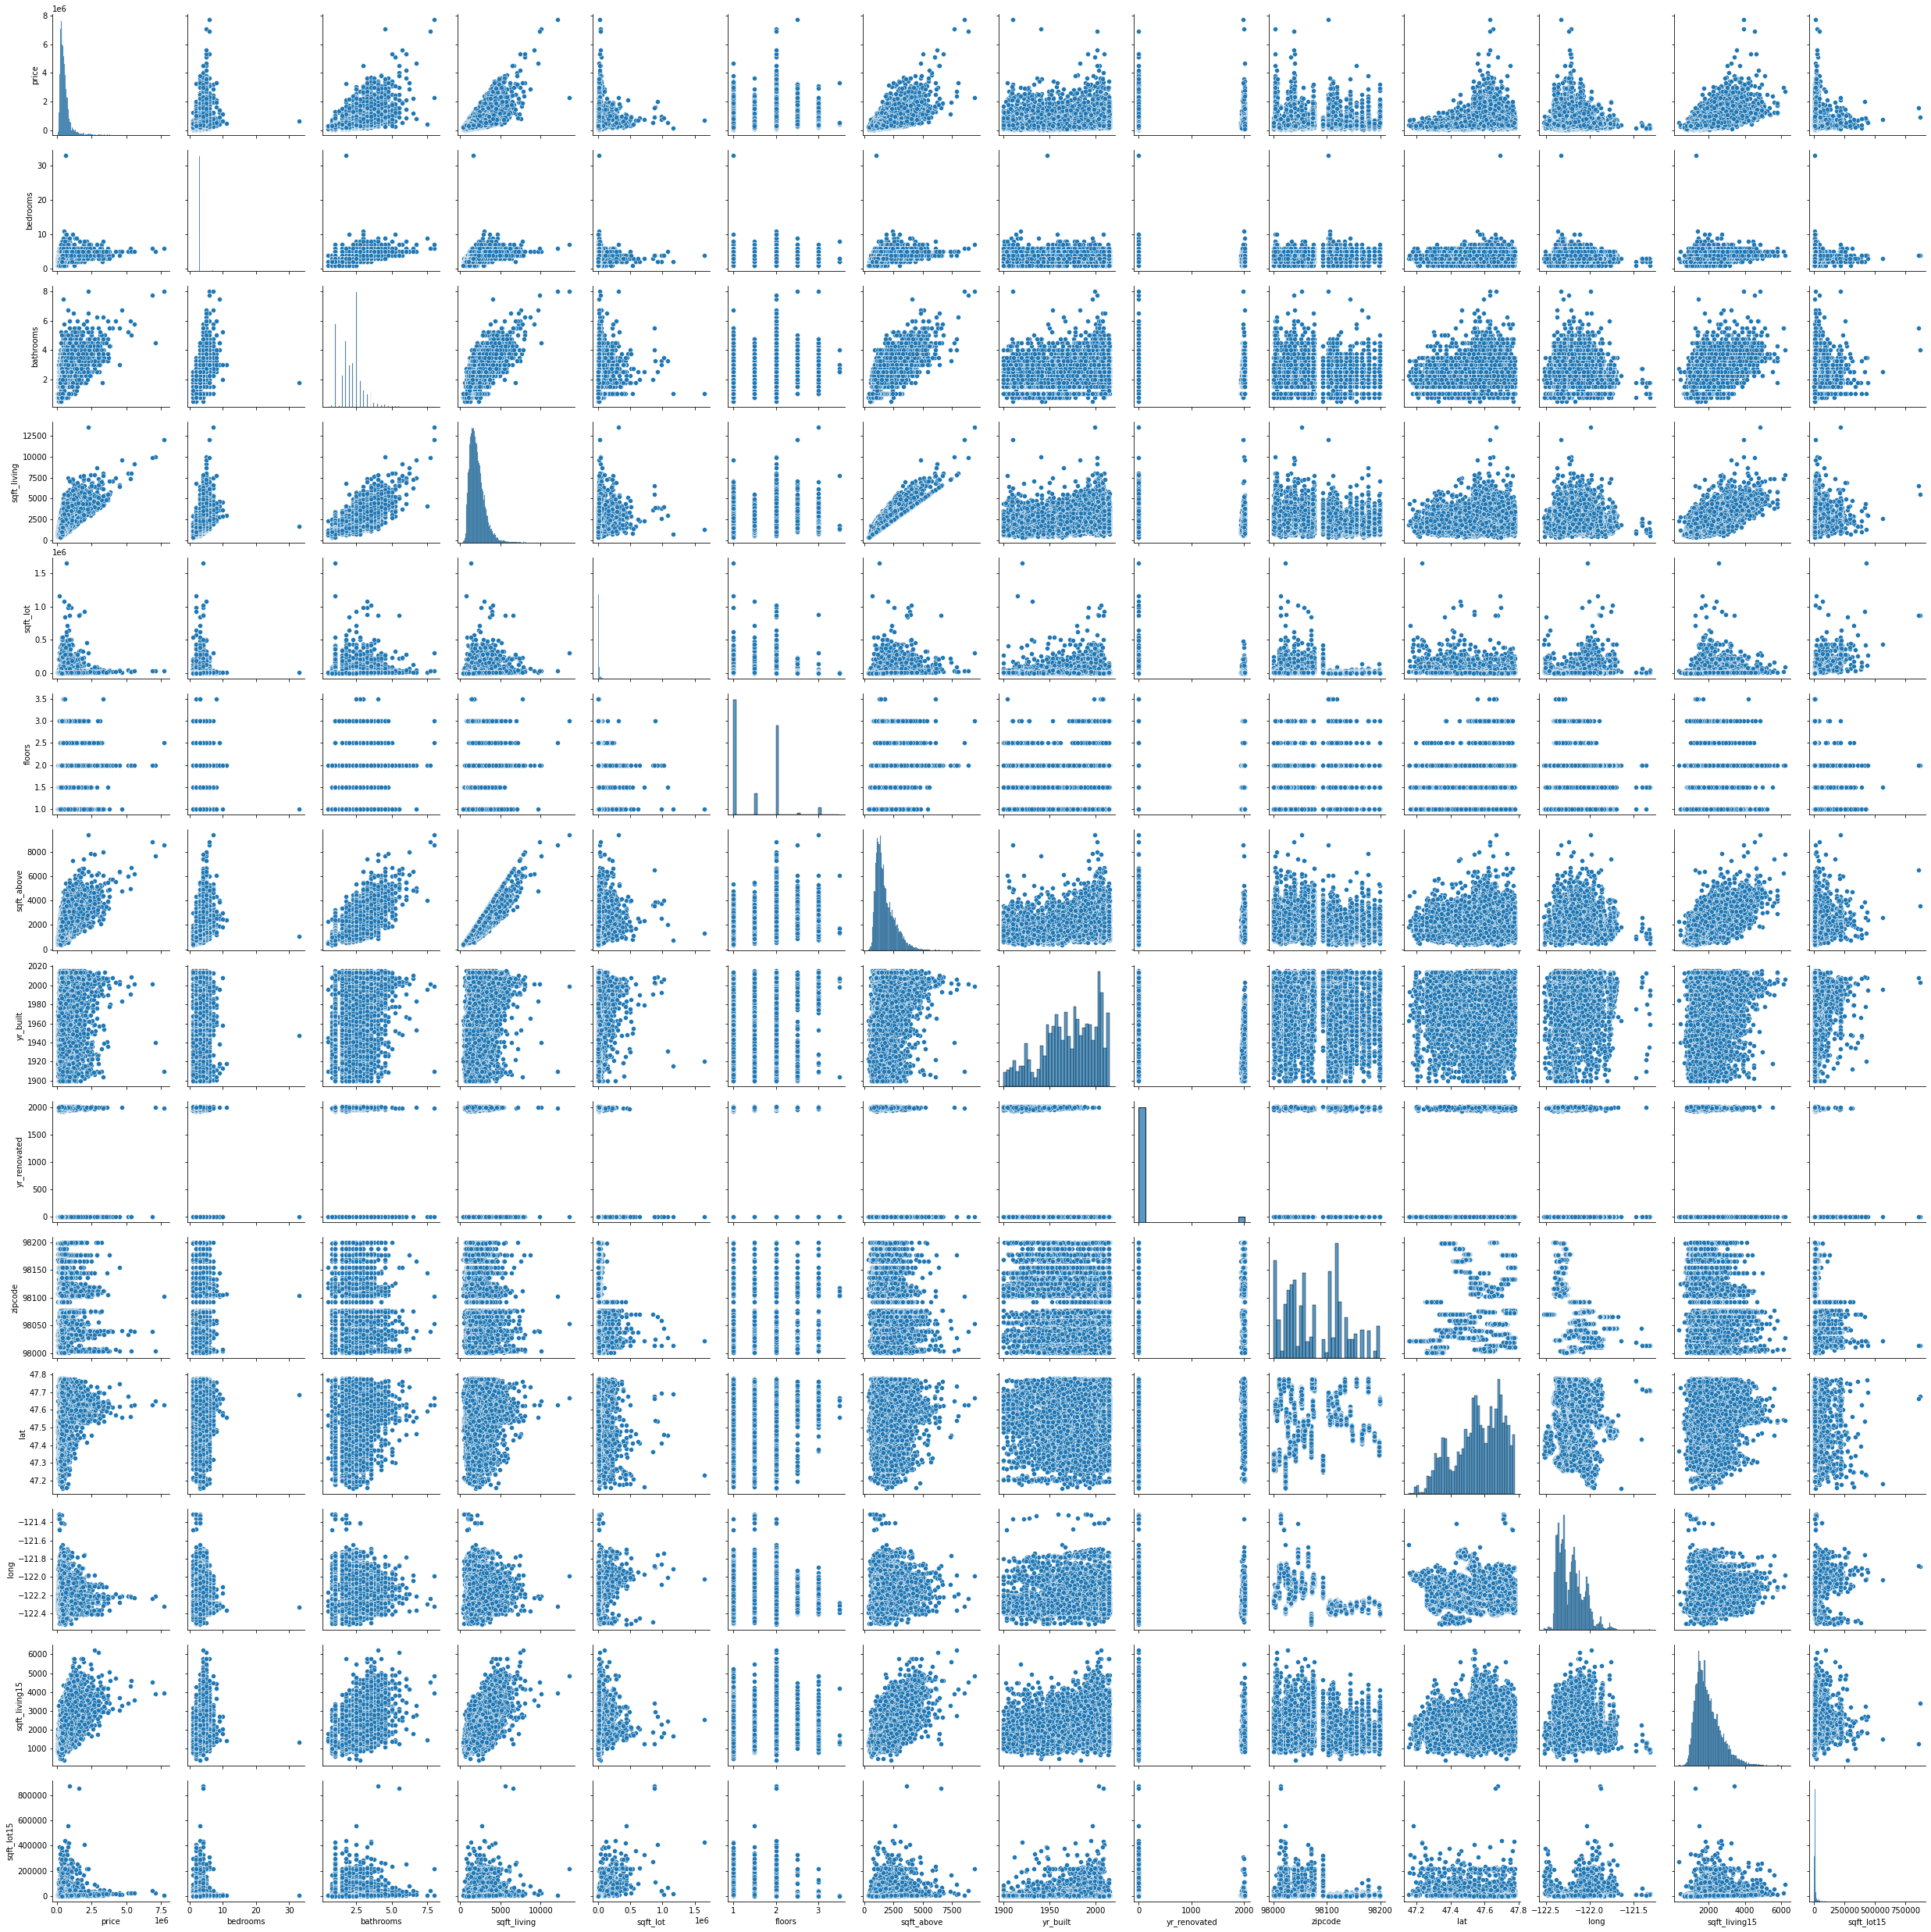

In [12]:
sns.pairplot(housing)
plt.show()

## DO NOT RUN CELL BELOW 

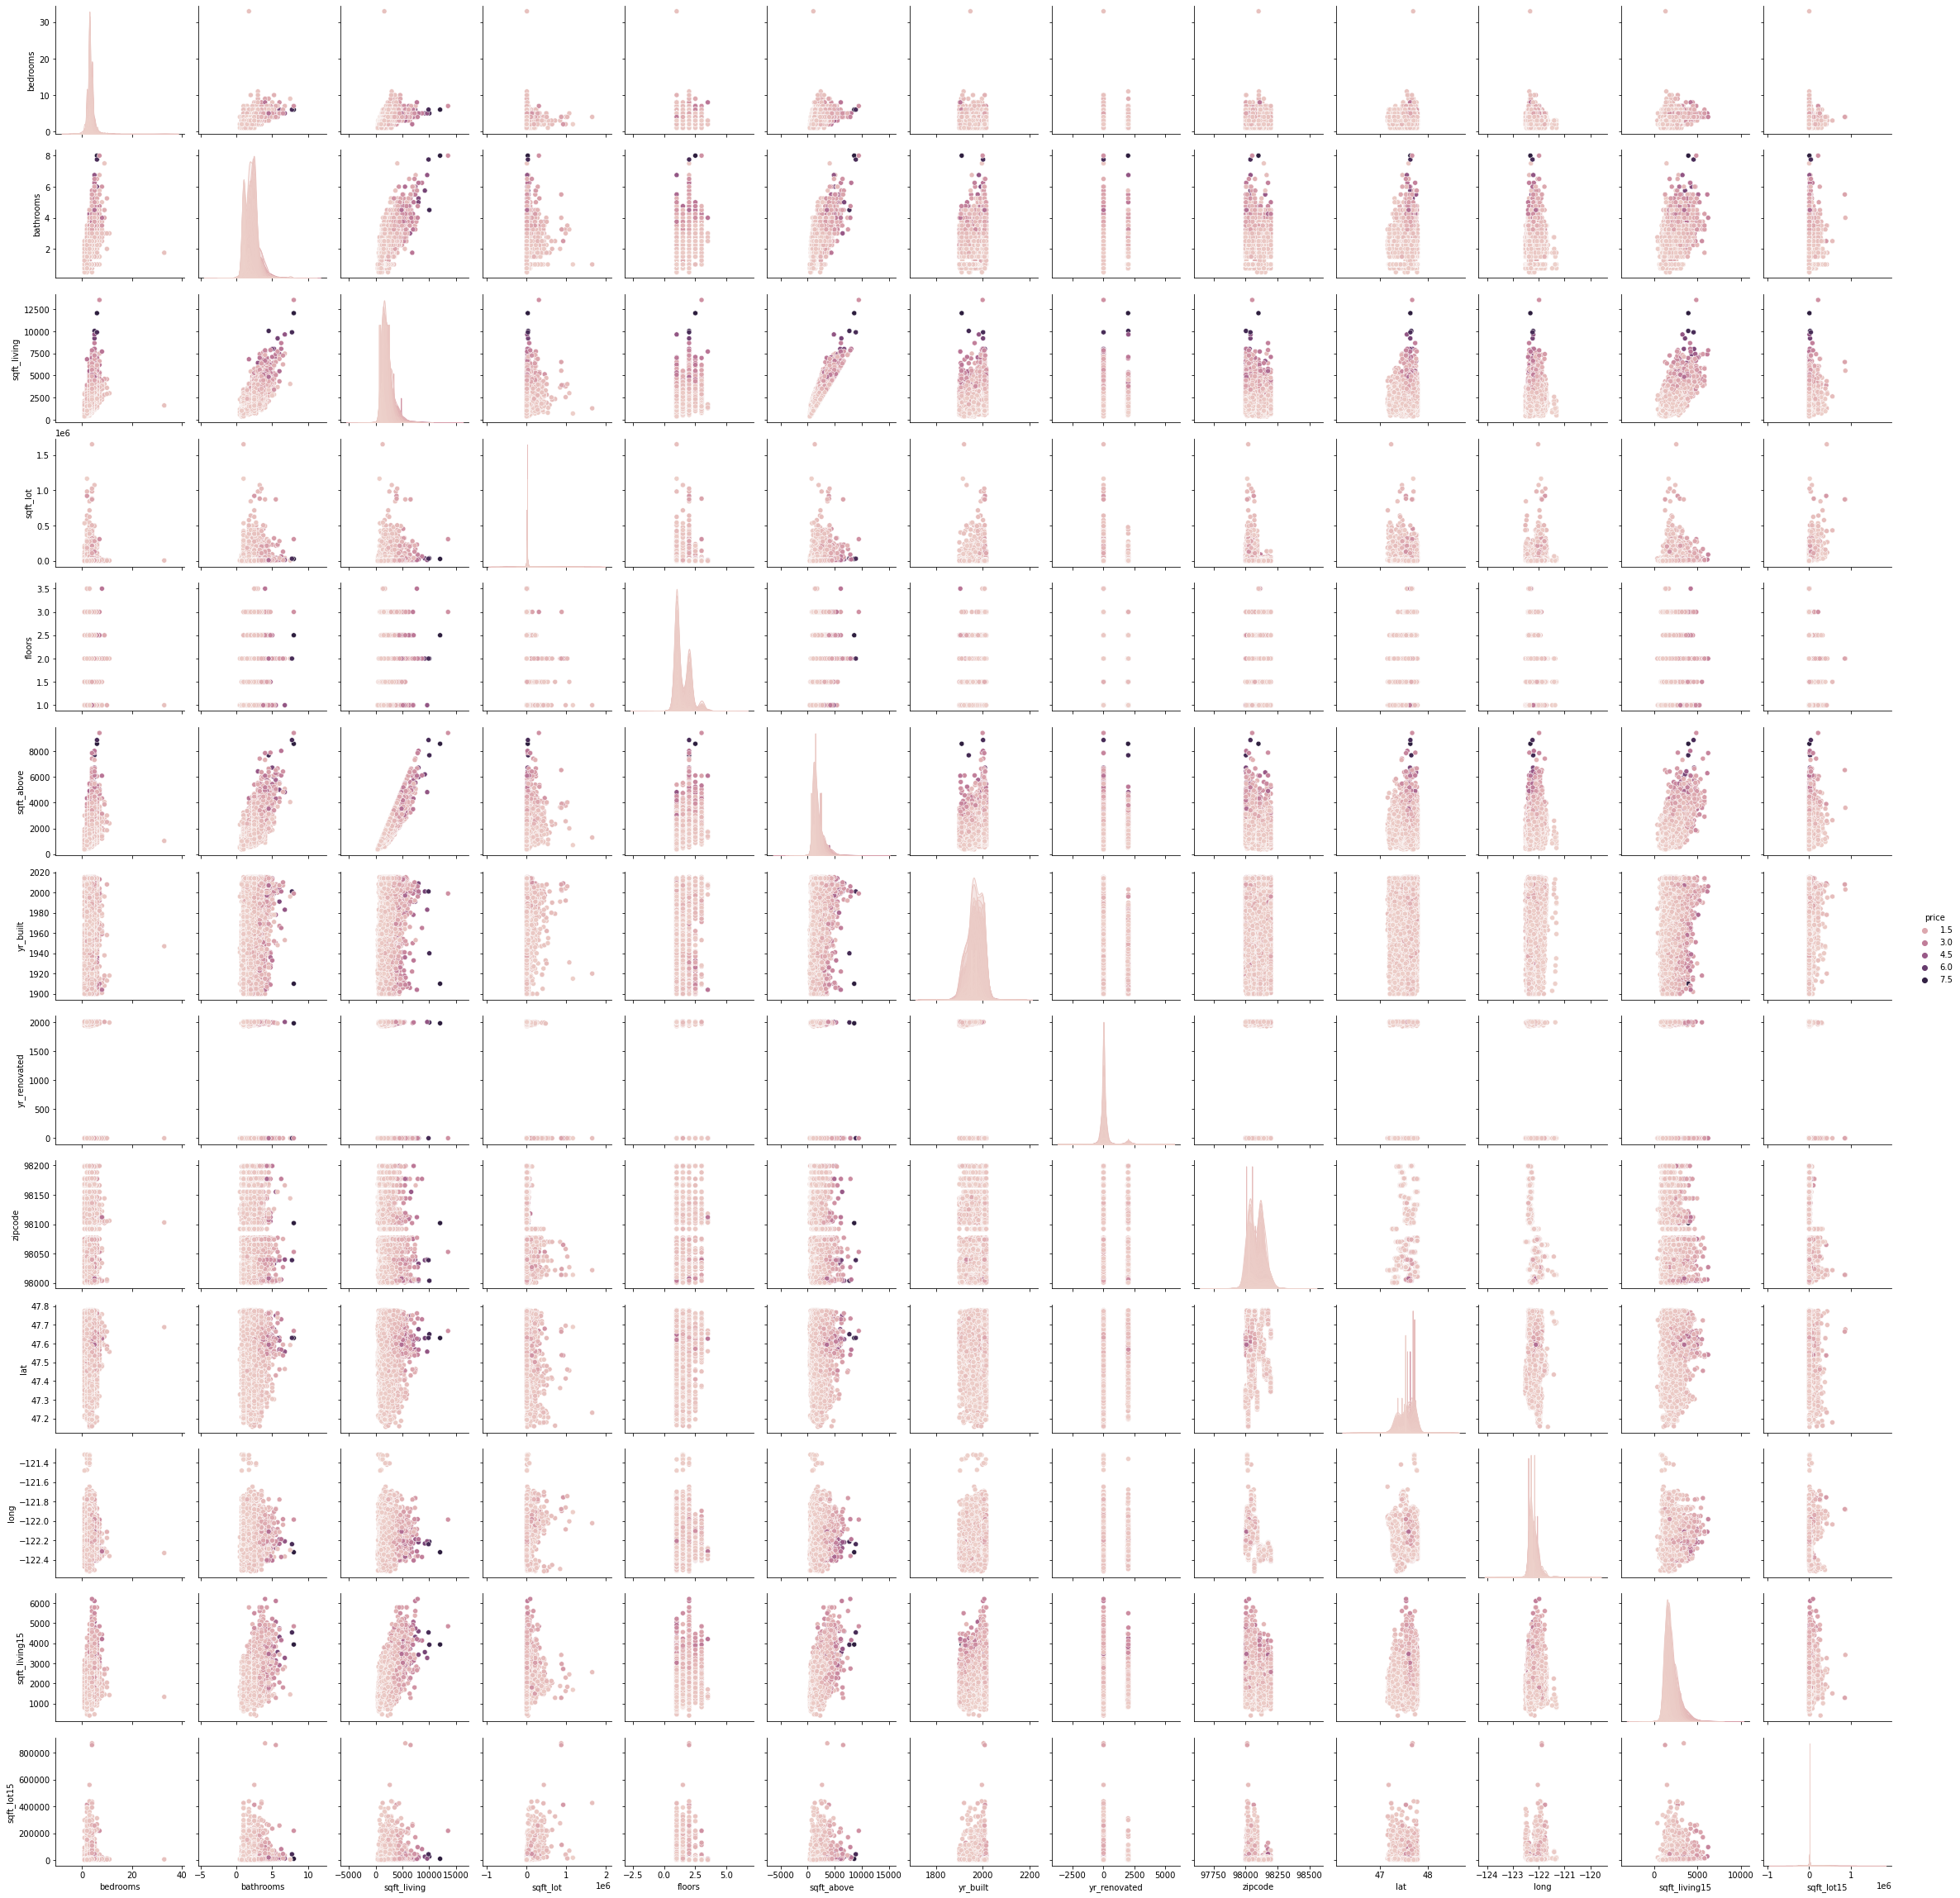

In [13]:
sns.pairplot(housing, 'price')

In [14]:
housing.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

In [15]:
housing.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308787   0.525906     0.701917  0.089876  0.256804   
bedrooms       0.308787  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.525906  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.701917  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.089876  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.256804  0.177944   0.502582     0.353953 -0.004814  1.000000   
sqft_above     0.605368  0.479386   0.686668     0.876448  0.184139  0.523989   
yr_built       0.053953  0.155670   0.507173     0.318152  0.052946  0.489193   
yr_renovated   0.129599  0.018495   0.051050     0.055660  0.004513  0.003535   
zipcode       -0.053402 -0.154092  -0.204786    -0.199802 -0.129586 -0.059541   
lat            0.306692 -0.009951   0.024280     0.052155 -0.085514  0.049239   
long           0.022036  0.132054   0.224903     0.241214  0.230227  0.125943   
sqft_living15  0.585241  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15     0.082845  0.030690   0.088303     0.184342  0.718204 -0.010722   

               sqft_above  yr_built  yr_renovated   zipcode       lat  \
price            0.605368  0.053953      0.129599 -0.053402  0.306692   
bedrooms         0.479386  0.155670      0.018495 -0.154092 -0.009951   
bathrooms        0.686668  0.507173      0.051050 -0.204786  0.024280   
sqft_living      0.876448  0.318152      0.055660 -0.199802  0.052155   
sqft_lot         0.184139  0.052946      0.004513 -0.129586 -0.085514   
floors           0.523989  0.489193      0.003535 -0.059541  0.049239   
sqft_above       1.000000  0.424037      0.022137 -0.261570 -0.001199   
yr_built         0.424037  1.000000     -0.225209 -0.347210 -0.148370   
yr_renovated     0.022137 -0.225209      1.000000  0.069846  0.032145   
zipcode         -0.261570 -0.347210      0.069846  1.000000  0.266742   
lat             -0.001199 -0.148370      0.032145  0.266742  1.000000   
long             0.344842  0.409993     -0.072156 -0.564259 -0.135371   
sqft_living15    0.731767  0.326377     -0.000247 -0.279299  0.048679   
sqft_lot15       0.195077  0.070777      0.003852 -0.147294 -0.086139   

                   long  sqft_living15  sqft_lot15  
price          0.022036       0.585241    0.082845  
bedrooms       0.132054       0.393406    0.030690  
bathrooms      0.224903       0.569884    0.088303  
sqft_living    0.241214       0.756402    0.184342  
sqft_lot       0.230227       0.144763    0.718204  
floors         0.125943       0.280102   -0.010722  
sqft_above     0.344842       0.731767    0.195077  
yr_built       0.409993       0.326377    0.070777  
yr_renovated  -0.072156      -0.000247    0.003852  
zipcode       -0.564259      -0.279299   -0.147294  
lat           -0.135371       0.048679   -0.086139  
long           1.000000       0.335626    0.255586  
sqft_living15  0.335626       1.000000    0.183515  
sqft_lot15     0.255586       0.183515    1.000000

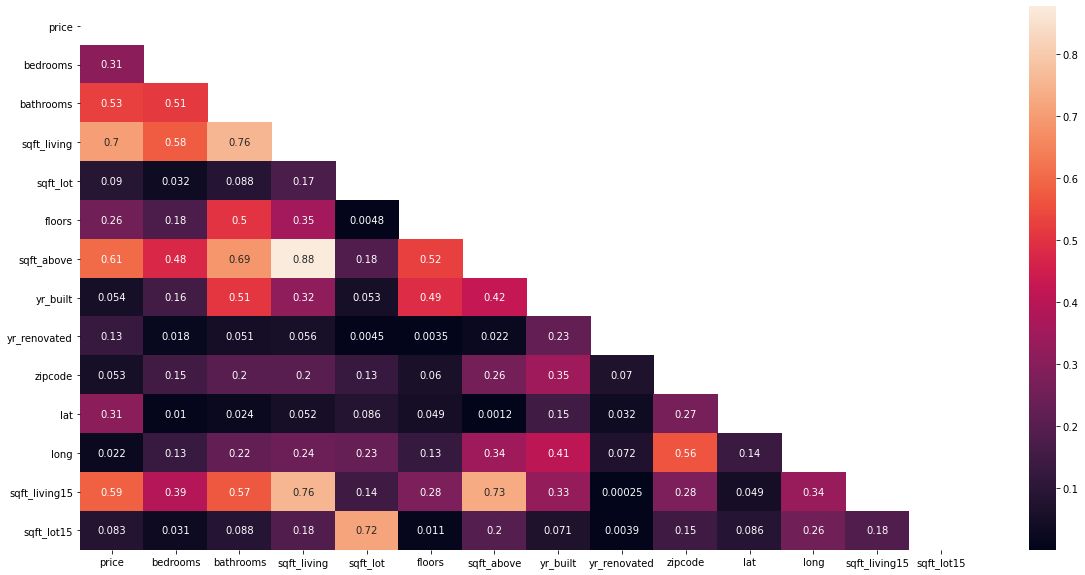

In [16]:
mask = np.triu(np.ones_like(housing.corr(), dtype=bool))

plt.figure(figsize=(20,10))

cor = housing.corr().abs()
sns.heatmap(cor, mask=mask, annot=True);